## Parte III – Validação Holdout em Problema Não-Linearmente Separável

## Aluna: Anna Alicia Milani - 1915310030

### Neste projeto prático, a biblioteca sci-kit learn só deve ser utilizada para o cálculo de métricas de desempenho.

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt
import import_ipynb
from parte1 import teachPerceptronByEpoch, getPredictedVector, getInputVectorGroup

### Todas as equipes devem considerar o arquivo dataHoldout.txt e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

In [4]:
dfHoldout = np.fromfile('data/dataHoldout.txt').reshape(-1, 3)

In [5]:
dfHoldout

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

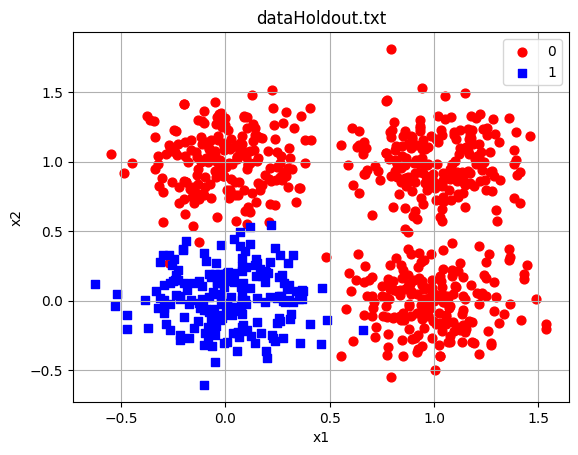

In [6]:
plt.scatter(dfHoldout[:,0][dfHoldout[:, 2] == 0.0], dfHoldout[:,1][dfHoldout[:, 2] == 0.0], c='r', s=40, marker='o', label='0')
plt.scatter(dfHoldout[:,0][dfHoldout[:, 2] == 1.0], dfHoldout[:,1][dfHoldout[:, 2] == 1.0], c='b', s=40, marker='s', label='1')
plt.title('dataHoldout.txt')
plt.legend()
plt.ylabel('x2')
plt.xlabel('x1')
plt.grid(True)
plt.show()

### Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 60% dos exemplos (treinamento) e outra contendo 40% (teste).

In [7]:
import random
random.shuffle(dfHoldout)

dfHoldout_size = len(dfHoldout)

data_train = dfHoldout[:int(dfHoldout_size * 0.6)]
data_test = dfHoldout[int(dfHoldout_size * 0.6):]


In [8]:
dfHoldout_size

800

In [9]:
len(data_train)

480

In [10]:
len(data_test)

320

In [11]:
X_test = data_test[: , :2]
y_test = data_test[:,2:]

### Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em ordem aleatória.

In [12]:
weightsVector = teachPerceptronByEpoch(data_train, len(data_train), 100)

vetor de pesos:  [0.05882359 0.29831766 0.14248401]
Época: 1 
Número de ajustes feitos no vetor de pesos na época: 24
Número de ajustes feitos no vetor de pesos até o momento: 24

Época: 2 
Número de ajustes feitos no vetor de pesos na época: 18
Número de ajustes feitos no vetor de pesos até o momento: 42

Época: 3 
Número de ajustes feitos no vetor de pesos na época: 14
Número de ajustes feitos no vetor de pesos até o momento: 56

Época: 4 
Número de ajustes feitos no vetor de pesos na época: 10
Número de ajustes feitos no vetor de pesos até o momento: 66

Época: 5 
Número de ajustes feitos no vetor de pesos na época: 14
Número de ajustes feitos no vetor de pesos até o momento: 80

Época: 6 
Número de ajustes feitos no vetor de pesos na época: 16
Número de ajustes feitos no vetor de pesos até o momento: 96

Época: 7 
Número de ajustes feitos no vetor de pesos na época: 12
Número de ajustes feitos no vetor de pesos até o momento: 108

Época: 8 
Número de ajustes feitos no vetor de peso

### Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparando-a com a saída desejada

In [13]:
inputVectorGroup = getInputVectorGroup(data_test, len(data_test))
predictedOutputVector = getPredictedVector(inputVectorGroup, weightsVector)

### 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

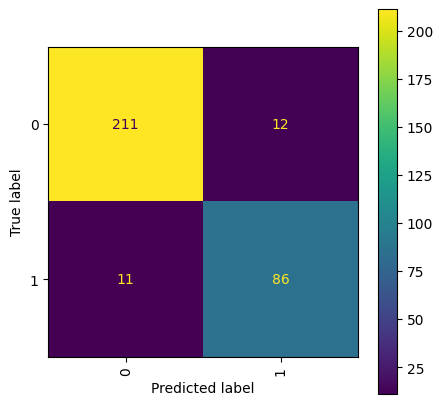

In [14]:
cm = confusion_matrix(y_test, predictedOutputVector)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 5))
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

### 2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

In [15]:
accuracy = round(accuracy_score(y_test, predictedOutputVector) * 100, 2)

### 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;

### A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

### Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.